# sorting

This notebook is used to sort through the listings from craigslist and identify those that mention parks in their description

## step one: data description clean up
### listings
1. Load the listing data from the scraping notebook 
2. remove extra spaces and symbols and set the text to all lowercase. 
3. delete duplicate listings 

In [298]:
listingsDf_trim = pd.read_pickle('combined_df.pkl')

In [299]:
import re

def remove_and_clean(text):
    text = re.sub(("\n"), " ", text)
    text = text.lower()
    return text

listingsDf_trim['description'] = listingsDf_trim['description'].apply(remove_and_clean)

In [300]:
listingsDf_trim.drop_duplicates(subset='description', inplace=True)

## step two: start sorting

we want to sort the listings to see insantances when parks are mentioned. to do so we:
>- load a parks file from the county data hub with the names and loactions of all the parks in the county. 
>- create a list of neighborhoods in Los Angeles that are named after parks to exclude from our "parks_True" category
>- create a list of words that allude to parks to inlcude in our "parks_True" category
>- make a function that will read through all the descriptions and identify those that mention a park. the function will identify the listings that mention a park by putting a "true" vlaue in a new column Park_TF.
>- compliment the above fonction with another that will identify what in the decription that flagged it as mentioning a park. this was mainly used to check work. 
>- check and see what we are capturing with a count of the numebr of listing with parks mentioend using value counts

In [311]:
import geopandas as gpd

parks = gpd.read_file('county_parks.geojson')

There are a bunch of neighborhoods (and transit stations) in Los Angeles that are named after a park.. tricky. We wanted to take these listings out and any terms luxury developers use to reffer to their ammenities that aren't public (for example "rooftop park") this process of identifying terms required a lot of trial and errror to read through sample posts and identify trends

In [302]:
excluded = ['highland park',
           'hancock park',
           'echo park and silverlake',
            'echo park',
            'silverlake and echo park',
            'silverlake, echo park',
            'echo park, silverlake',
           'rancho park',
           'macarthur park station',
           'south park',
           'rooftop park',
           'hollywood bowl']

There are some listings that allude to a park or many parks without naming the exact one. We wanted ot inlcude those listings in our analysis so we created a list of terms that allude to parks called "park_terms". This is also a little tricky becuase you want to avoid counting anything that is referring to parking. 

In [303]:
park_terms = ['hike', 
                'hiking',
                'trail', 
                'trails', 
                'community park',
                'community parks', 
                'local park',
                'local parks',
                 'parks nearby',
                'public parks',
                'public park',
                'echo park lake',
                'park access',
                'parks',
              'recreational parks',
              'a park nearby',
              'the park',
              'park nearby',
              'griffith park',
              'exposition park',
              'recreation center',
              'rergional park',
              'griffith park,'
                 ]

This function reads descriptions and makes every listing that has a park name from the parks data file "true" unless its one of the excluded terms for neigborhoods named after parks ie highland park, then adds all the posts that have one of the park terms as true.

In [304]:
listingsDf_trim['park_TF'] = listingsDf_trim['description'].apply(
    lambda x: any(substring in x for substring in parks['PARK_NAME'].str.lower()) and not any(substring in x for substring in excluded)or any(substring in x for substring in park_terms))

We also want to know why the function named the listing true so we added another column called park_T_why which fills in the terms that flagged the description as mentioning a park

## step three: look at what we found

>- compliment the above fonction with another that will identify what in the decription that flagged it as mentioning a park. this was mainly used to check work. 
>- check and see what we are capturing with a count of the numebr of listing with parks mentioend using value counts
>- look at a sample of the listings that were flagged as true and make sure it makes sense
>- map the listings to see what it looks like on a map
>- export sorted listings for futher analysis

In [305]:
listingsDf_trim['park_T_why'] = listingsDf_trim['description'].apply(
    lambda x: [substring for substring in parks['PARK_NAME'].str.lower() if substring in x and substring not in excluded] or [substring for substring in park_terms if substring in x]
)

In [306]:
listingsDf_trim.park_TF.value_counts()

False    6133
True     1450
Name: park_TF, dtype: int64

In [307]:
listsingsDf_trim_parks = listingsDf_trim[listingsDf_trim['park_TF'] == True]
pd.set_option('max_colwidth', None)
listsingsDf_trim_parks[['description', 'park_T_why']].head()

,description,park_T_why
2,welcome to casa de vida apartments west la living 500 off when you sign a 12 month lease live video calls in person tours available casa de vida in los angeles has the neighborhood you want with the amenities you need these casa de vida apartments for rent offer resort style living at its finest we are centrally located and just minutes from shopping schools banking and entertainment in just a short drive you are on major freeways the 405 and 10 the campus of ucla is only minutes away as well as west los angeles jr college beautiful santa monica and marina del rey are a short drive west for a day at the beach lounge in our recreation room cool down in our pool or relax in our sauna treat your friends to an afternoon barbecue then after you can play some pool in our billiards room we also have a fitness center to help meet all your fitness needs every home is equipped with air conditioning private balcony patio granite countertops and dishwashers step into casa de vida apartments in los angeles ca call today to schedule your tour your new apartment home features dishwasher microwave private balconies and patios ceiling fan refrigerator mirrored closet doors granite counter tops breakfast bar air conditioning property features laundry facilities recreation room billiards room picnic area with barbecue package service shimmering swimming pool controlled access gated sauna covered parking public parks nearby easy access to shopping elevator easy access to freeways on call maintenance access to public transportation beautiful landscaping state of the art fitness center with select apartment homes 3230 overland avenue los angeles ca 90034 contact us call show contact info visit us online https www3230overlandcom surrounding cities and neighborhoods palms culver city mar vista west los angeles century city baldwin hills rancho park cheviot hills,"[parks nearby, public parks, public park, parks]"
49,imagine a home where the fine art of living has been perfected welcome to the orsini home to the best apartments in downtown los angeles from the moment you enter the elegant mediterranean inspired 2 story foyer at the orsini you will realize that you have come home to a new experience in luxury apartment living we are in the heart of los angeles california and the pulse of extraordinary living enjoy a short commute to the la fashion district staples center disney concert hall chinatown and all the amazing dining and glamorous shopping that living in los angeles has to offer amenities and features additional monthly parking available beautiful los angeles city views from many vantage points solid hardwood oak entry doors full swing virtual golf karaoke lounge generous walk in closets with organizers individual apartment balconies or patios separate storage facilities airy interiors with nine foot ceilings den study resident lounge with full bar kitchen facilities dedicated gated parking for residents call show contact info website https liveghpcom v2czjq26 orsini address 505 n figueroa st los angeles ca 90012 pricing and availability are subject to change little tokyo downtown la apartments toy district civic center student apartments hollywood hills west los feliz luxury housing historic core central los angeles apartments arts district los angeles silver lake student housing gallery row downtown housing mid city pico union carthay downtown apartments fidm east hollywood fashion institute apartments elysian park downtown la housing usc dt los angeles warehouse district university of southern california apartments griffith park old bank district downtown los angeles housing hollywood dt los angeles apartments dtla jewelry district fidm housing los angeles housing university of southern california fashion institute downtown los angeles central la apartments dtla apartments bunker hill wholesale district los angeles apartments fidm apartments windsor square dt los angeles housing downtown los angeles apartments kore

In [308]:
listingsDf_trim = listingsDf_trim[listingsDf_trim['lat'] != 'NA']
gdf = gpd.GeoDataFrame(listingsDf_trim, geometry=gpd.points_from_xy(listingsDf_trim.long, listingsDf_trim.lat), crs="EPSG:4326")

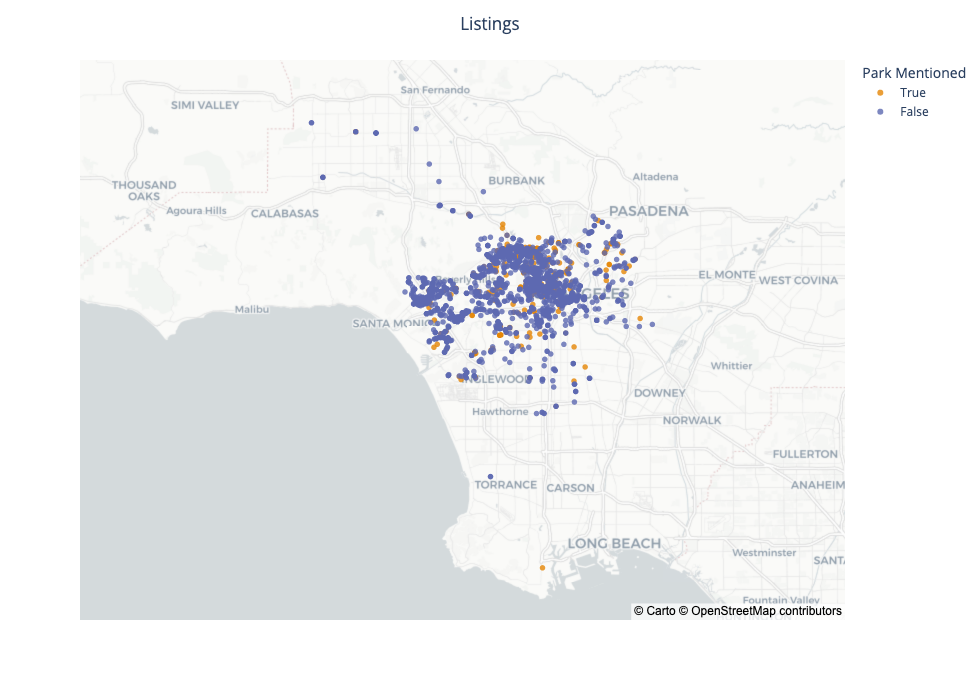

In [309]:
# import libraries
import plotly.express as px
import matplotlib.pyplot as plt


# create scatter map
fig = px.scatter_mapbox(gdf, 
                        lat=test.geometry.y, 
                        lon=test.geometry.x, 
                        color="park_TF",
                        mapbox_style="carto-positron",
                        zoom=9,
                        center = {"lat": 34, "lon": -118.4},
                        opacity=.8,
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        hover_data={"park_T_why": True}
                       )
                               

# options on the layout
fig.update_layout(
        width = 900,
        height = 700,
        title = "Listings",
        title_x = .5
    )

fig.update_traces(
    hovertemplate="Park mentioned: %{customdata[0]}<extra></extra>"
)

fig.update_layout(legend_title_text="Park Mentioned")

fig.show()

In [310]:
listingsDf_trim.to_pickle("./listings_sorted.pkl")